In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import utm

In [2]:
df = pd.read_csv('../data/AB_VD_2019.csv')

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,7381,Chalet Chocolat,19480,Paula,Aigle,Ormont-Dessus,46.354975,7.131984,Entire home/apt,110,3,16,2018-11-07,0.21,1,214
1,26809,"Quiet bedroom, private bathroom",94917,Eric,Lavaux-Oron,Pully,46.522275,6.664252,Private room,70,2,117,2017-01-22,1.16,1,0
2,50123,Not Available any longer,229512,Christopher,Nyon,Mont-sur-Rolle,46.475396,6.328829,Private room,897,4,0,NaN,NaN,1,365
3,129558,Vos vacances à Lausanne,638930,Carol,Lausanne,Lausanne,46.538726,6.620345,Private room,91,7,0,NaN,NaN,1,365
4,198351,Cosy Room,967965,Isabelle,Riviera-Pays-d'Enhaut,Montreux,46.448284,6.897443,Private room,55,1,0,NaN,NaN,1,360


In [4]:
df.shape

(3672, 16)

In [5]:
# We transform latitude and longitude in UTM coordinates. Because the Earth portion at which we are looking is quite small, UTM provides enough accuracy.
df['utm'] = df.apply(lambda row : utm.from_latlon(row.latitude, row.longitude)[:2], axis=1)
df['utm_x'] = df.apply(lambda row : row.utm[0], axis=1)
df['utm_y'] = df.apply(lambda row : row.utm[1], axis=1)

In [6]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,utm,utm_x,utm_y
0,7381,Chalet Chocolat,19480,Paula,Aigle,Ormont-Dessus,46.354975,7.131984,Entire home/apt,110,3,16,2018-11-07,0.21,1,214,"(356284.13366181136, 5135184.464676911)",356284.133662,5.135184e+06
1,26809,"Quiet bedroom, private bathroom",94917,Eric,Lavaux-Oron,Pully,46.522275,6.664252,Private room,70,2,117,2017-01-22,1.16,1,0,"(320849.4385123323, 5154729.06078539)",320849.438512,5.154729e+06
2,50123,Not Available any longer,229512,Christopher,Nyon,Mont-sur-Rolle,46.475396,6.328829,Private room,897,4,0,NaN,NaN,1,365,"(294947.3310240583, 5150336.497250906)",294947.331024,5.150336e+06
3,129558,Vos vacances à Lausanne,638930,Carol,Lausanne,Lausanne,46.538726,6.620345,Private room,91,7,0,NaN,NaN,1,365,"(317536.98538787034, 5156657.559743524)",317536.985388,5.156658e+06
4,198351,Cosy Room,967965,Isabelle,Riviera-Pays-d'Enhaut,Montreux,46.448284,6.897443,Private room,55,1,0,NaN,NaN,1,360,"(338515.75377157924, 5146004.75252279)",338515.753772,5.146005e+06


In [7]:
# Only taking a sample of the full dataframe, 50'000 Airbnb lead to too much computations.
seed = 1
n = 5000
df_red = df#df.sample(n, random_state=seed)

In [8]:
# Standardizing the UTM coordinates
df_coord = df_red[['utm_x', 'utm_y']]
df_coord.utm_x = (df_coord.utm_x - df_coord.utm_x.mean()) / df_coord.utm_x.std()
df_coord.utm_y = (df_coord.utm_y - df_coord.utm_y.mean()) / df_coord.utm_y.std()

C:\Users\furter\Miniconda3\envs\ntds_2019\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [9]:
df_coord.head()

,utm_x,utm_y
0,1.626348,-1.138779
1,-0.237440,0.378956
2,-1.599834,0.037851
3,-0.411667,0.528713
4,0.691770,-0.298530


In [10]:
# Computing distance between all airbnbs.
from scipy.spatial.distance import squareform, pdist
df_dist = pd.DataFrame(squareform(pdist(df_coord.iloc[:, 0:])), columns=df_coord.index, index=df_coord.index)

In [11]:
df_dist.head()

,0,1,2,3,4,5,6,7,8,9,...,3662,3663,3664,3665,3666,3667,3668,3669,3670,3671
0,0.000000,2.403586,3.434052,2.633256,1.256764,2.741595,0.132731,3.658341,4.734479,1.395377,...,2.453966,2.522000,0.086454,2.458754,2.542792,2.559584,2.524885,2.306861,2.443526,2.417069
1,2.403586,0.000000,1.404447,0.229745,1.149964,0.338988,2.530992,2.112365,2.643376,1.008209,...,0.728272,0.135302,2.484551,0.330112,0.165537,0.158337,0.357959,0.107399,0.144126,0.027228
2,3.434052,1.404447,0.000000,1.285568,2.316161,1.207162,3.566671,0.903343,3.074329,2.164260,...,2.058065,1.281513,3.520465,1.662699,1.249518,1.293235,1.646490,1.429895,1.272321,1.377449
3,2.633256,0.229745,1.285568,0.000000,1.379096,0.113302,2.760553,2.058880,2.469228,1.237889,...,0.775621,0.133891,2.714136,0.377525,0.134671,0.081309,0.363085,0.330926,0.242377,0.218344
4,1.256764,1.149964,2.316161,1.379096,0.000000,1.488851,1.382575,2.744690,3.565007,0.153128,...,1.275609,1.272347,1.336387,1.211258,1.294994,1.307228,1.277752,1.056591,1.201208,1.164805


In [12]:
mean = df_dist.mean().mean()
print('The mean distance is {m}'.format(m=mean))

The mean distance is 1.6409438095170668


In [13]:
epsilon = 0.7
sigma = mean * 0.1
def sparsify(x):
    sigm_x = np.exp(- x**2 / (2*sigma**2))
    if sigm_x < epsilon:
        return 0
    return sigm_x

In [14]:
# compute weights of the edges, sparsifying.
df_dist_s = df_dist.applymap(sparsify)
print('there are {i} non-zero entries'.format(i = df_dist_s.astype(bool).sum().sum()))

there are 1110014 non-zero entries


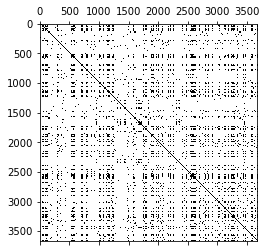

In [15]:
plt.spy(df_dist_s)
plt.show()

In [16]:
# create adjacency matrix, as a numpy array
adj = df_dist_s.values - np.eye(df_dist_s.shape[0])

In [17]:
adj

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.80720242, 0.        ,
        0.98632822],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.80720242, 0.        , ..., 0.        , 0.        ,
        0.7898555 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.77206894],
       [0.        , 0.98632822, 0.        , ..., 0.7898555 , 0.77206894,
        0.        ]])

In [18]:
# dictionnary to rename the labels of the nodes according to their indice in the df
nodes_labels = dict(zip(np.arange(n), df_dist_s.index))

In [19]:
# create networkx graph, renaming nodes
import networkx as nx
G = nx.from_numpy_matrix(adj)
G = nx.relabel_nodes(G, nodes_labels)

In [20]:
G.size()

553171

In [21]:
# create dictionnary for nodes positions
coord_dict = df_red.utm.to_dict()

C:\Users\furter\Miniconda3\envs\ntds_2019\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


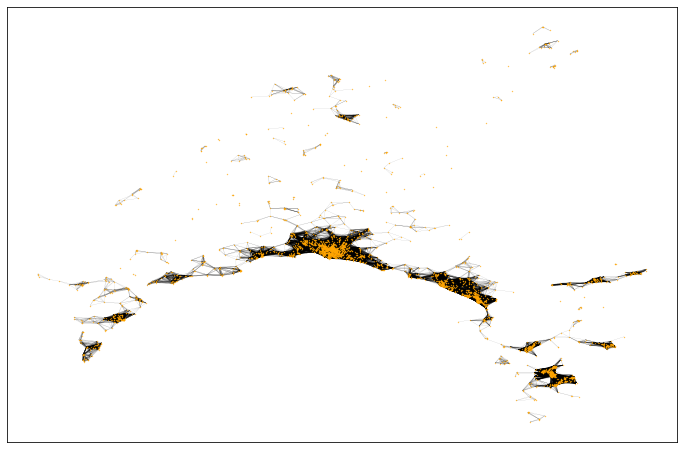

In [22]:
# graph of the airbnb
plt.figure(figsize=(12,8))
nx.draw_networkx(G, pos=coord_dict, with_labels=False, node_size=0.1, node_color='orange', width=0.05)
plt.show()

In [23]:
# different neighbourhood
df_red.neighbourhood_group.value_counts()

Lausanne                 1080
Riviera-Pays-d'Enhaut     693
Aigle                     656
Nyon                      313
Lavaux-Oron               249
Ouest lausannois          228
Morges                    195
Jura-Nord vaudois         142
Gros-de-Vaud               59
Broye-Vully                57
Name: neighbourhood_group, dtype: int64

In [24]:
neighbourhoud_to_int = {
    'Manhattan': 1,
    'Brooklyn': 2,
    'Queens': 3,
    'Bronx': 4,
    'Staten Island': 5
}

In [25]:
ground_truth_nei = df_red.neighbourhood_group.apply(lambda x: neighbourhoud_to_int.get(x)).values
ground_truth_nei[:5]

array([None, None, None, None, None], dtype=object)

C:\Users\furter\Miniconda3\envs\ntds_2019\lib\site-packages\matplotlib\colors.py:933: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
C:\Users\furter\Miniconda3\envs\ntds_2019\lib\site-packages\numpy\ma\core.py:718: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


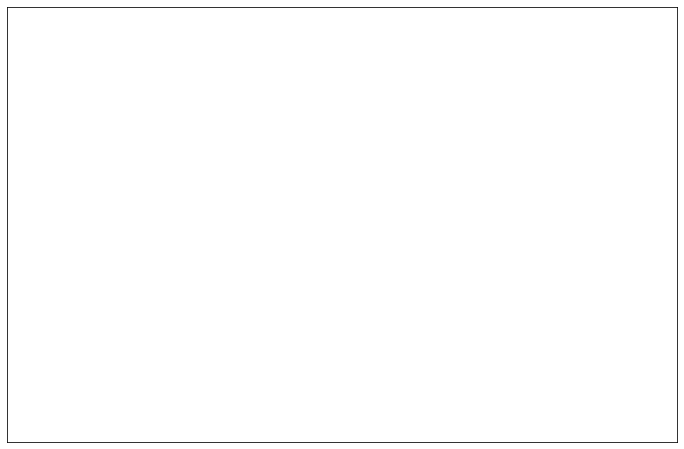

In [26]:
# graph of the airbnb with groundtruth
plt.figure(figsize=(12,8))
nx.draw_networkx(G, pos=coord_dict, with_labels=False, node_size=0.1, cmap=plt.get_cmap('rainbow'), node_color=ground_truth_nei, width=0.05)
plt.show()

We keep only the biggest connected component

In [27]:
Gc = max(nx.connected_component_subgraphs(G), key=len)

In [28]:
Gc_nodes = max(nx.connected_components(G), key=len)

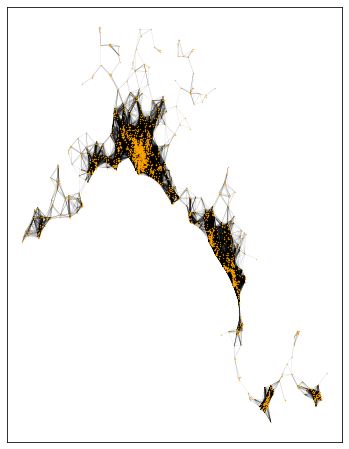

In [29]:
plt.figure(figsize=(6,8))
nx.draw_networkx(Gc, pos=coord_dict, with_labels=False, node_size=0.1, node_color='orange', width=0.05)
plt.show()

Running spectral clustering on the biggest connected component

In [30]:
adj_c = nx.adjacency_matrix(Gc)

In [31]:
from sklearn.cluster import SpectralClustering
sc = SpectralClustering(n_clusters=3, eigen_solver='amg', affinity='precomputed', n_init=100)
sc.fit(adj_c)

SpectralClustering(affinity='precomputed', assign_labels='kmeans', coef0=1,
                   degree=3, eigen_solver='amg', eigen_tol=0.0, gamma=1.0,
                   kernel_params=None, n_clusters=3, n_init=100, n_jobs=None,
                   n_neighbors=10, random_state=None)

C:\Users\furter\Miniconda3\envs\ntds_2019\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


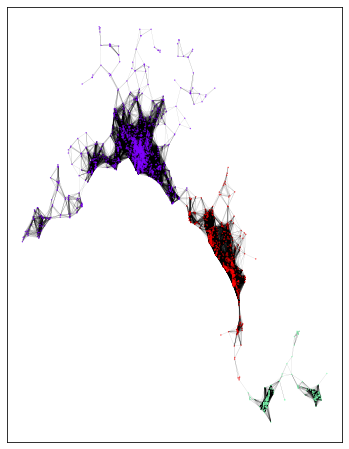

In [32]:
# displaying result of spectrcal clustering
plt.figure(figsize=(6,8))
nx.draw_networkx(Gc, pos=coord_dict, with_labels=False, node_size=0.1, cmap=plt.get_cmap('rainbow'), node_color=sc.labels_, width=0.05)
plt.show()

We can aslo try to run k-means, but it doesn't work well.

In [33]:
from sklearn.cluster import KMeans
km =  KMeans(n_clusters=5, init='k-means++', n_init=1, verbose=1)
km.fit(adj_c)

Initialization complete
Iteration  0, inertia 330189.824
Iteration  1, inertia 208826.489
Iteration  2, inertia 204645.869
Iteration  3, inertia 202145.476
Iteration  4, inertia 201384.134
Iteration  5, inertia 201100.006
Iteration  6, inertia 200948.012
Iteration  7, inertia 200821.203
Iteration  8, inertia 200599.143
Iteration  9, inertia 200364.537
Iteration 10, inertia 199879.485
Iteration 11, inertia 199260.419
Iteration 12, inertia 198801.453
Iteration 13, inertia 198538.527
Iteration 14, inertia 198439.083
Iteration 15, inertia 198272.654
Iteration 16, inertia 198008.947
Iteration 17, inertia 197845.782
Iteration 18, inertia 197695.280
Iteration 19, inertia 197610.117
Iteration 20, inertia 197467.673
Iteration 21, inertia 197390.710
Iteration 22, inertia 197350.086
Iteration 23, inertia 197314.077
Iteration 24, inertia 197297.997
Iteration 25, inertia 197269.106
Iteration 26, inertia 197206.983
Iteration 27, inertia 197125.245
Iteration 28, inertia 196888.256
Iteration 29, inert

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=1)

C:\Users\furter\Miniconda3\envs\ntds_2019\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


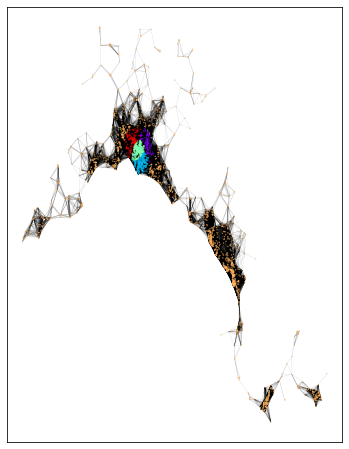

In [34]:
plt.figure(figsize=(6,8)) 
nx.draw_networkx(Gc, pos=coord_dict, with_labels=False, node_size=0.1, cmap=plt.get_cmap('rainbow'), node_color=km.labels_, width=0.05)
plt.show()